# __init__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
import pandas as pd

import numpy as np
np.random.seed(1337) #random state used throughout the notebook for reproducibility
from math import log

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
import networkx as nx
import community as louvain
from collections import Counter
import random

plt.style.use('classic')

# Skip Ahead to index file import

In [ ]:
sp500 = pd.read_csv('/content/drive/My Drive/collab_files/^GSPC.csv', header = 0, index_col = 'Date')
sp500.index = pd.to_datetime(sp500.index, format = '%d-%m-%y')
sp500 = sp500[1:]
#sp500 = sp500.resample('W').mean()
#sp500.head()
print(len(sp500))

#import nifty50 data
nifty = pd.read_csv('/content/drive/My Drive/collab_files/^NSEI.csv', header = 0, index_col = 'Date')
nifty.index = pd.to_datetime(nifty.index, format = '%d-%m-%y')
nifty = nifty.reindex(index = sp500.index, method = 'bfill')
nifty.fillna(method = 'bfill', inplace=True)
#nifty = nifty.resample('W').mean()
#nifty.head()
print(len(nifty))

sing_sti = pd.read_csv('/content/drive/My Drive/collab_files/^sti_d.csv', header = 0, index_col = 'Date')
sing_sti.index = pd.to_datetime(sing_sti.index, format = '%Y-%m-%d')
sing_sti = sing_sti.reindex(index = sp500.index, method = 'bfill')
sing_sti.fillna(method = 'bfill', inplace=True)
print(len(sing_sti))

uk_100 = pd.read_csv('/content/drive/My Drive/collab_files/^ukx_d.csv', header = 0, index_col = 'Date')
uk_100.index = pd.to_datetime(uk_100.index, format = '%Y-%m-%d')
uk_100 = uk_100.reindex(index = sp500.index, method = 'bfill')
uk_100.fillna(method = 'bfill', inplace=True)
print(len(uk_100))

hangseng = pd.read_csv('/content/drive/My Drive/collab_files/^hsi_d.csv', header = 0, index_col = 'Date')
hangseng.index = pd.to_datetime(hangseng.index, format = '%Y-%m-%d')
hangseng = hangseng.reindex(index = sp500.index, method = 'bfill')
hangseng.fillna(method = 'bfill', inplace=True)
print(len(hangseng))

nikkei = pd.read_csv('/content/drive/My Drive/collab_files/^nkx_d.csv', header = 0, index_col = 'Date')
nikkei.index = pd.to_datetime(nikkei.index, format = '%Y-%m-%d')
nikkei = nikkei.reindex(index = sp500.index, method = 'bfill')
nikkei.fillna(method = 'bfill', inplace=True)
print(len(nikkei))

shanghai_comp = pd.read_csv('/content/drive/My Drive/collab_files/^shc_d.csv', header = 0, index_col = 'Date')
shanghai_comp.index = pd.to_datetime(shanghai_comp.index, format = '%Y-%m-%d')
shanghai_comp = shanghai_comp.reindex(index = sp500.index, method = 'bfill')
shanghai_comp.fillna(method = 'bfill', inplace=True)
print(len(shanghai_comp))

inr = pd.read_csv('/content/drive/My Drive/collab_files/DEXINUS.csv', header = 0, index_col = 'DATE')
inr.index = pd.to_datetime(inr.index, format = '%Y-%m-%d')
inr = inr.reindex(index = sp500.index, method = 'bfill')
inr.fillna(method = 'bfill', inplace=True)
print(len(inr))

cny = pd.read_csv('/content/drive/My Drive/collab_files/DEXCHUS.csv', header = 0, index_col = 'DATE')
cny.index = pd.to_datetime(cny.index, format = '%Y-%m-%d')
cny = cny.reindex(index = sp500.index, method = 'bfill')
cny.fillna(method = 'bfill', inplace=True)
print(len(cny))

jpy = pd.read_csv('/content/drive/My Drive/collab_files/DEXJPUS.csv', header = 0, index_col = 'DATE')
jpy.index = pd.to_datetime(jpy.index, format = '%Y-%m-%d')
jpy = jpy.reindex(index = sp500.index, method = 'bfill')
jpy.fillna(method = 'bfill', inplace=True)
print(len(jpy))

sgd = pd.read_csv('/content/drive/My Drive/collab_files/DEXSIUS.csv', header = 0, index_col = 'DATE')
sgd.index = pd.to_datetime(sgd.index, format = '%Y-%m-%d')
sgd = sgd.reindex(index = sp500.index, method = 'bfill')
sgd.fillna(method = 'bfill', inplace=True)
print(len(sgd))

hkd = pd.read_csv('/content/drive/My Drive/collab_files/DEXHKUS.csv', header = 0, index_col = 'DATE')
hkd.index = pd.to_datetime(hkd.index, format = '%Y-%m-%d')
hkd = hkd.reindex(index = sp500.index, method = 'bfill')
hkd.fillna(method = 'bfill', inplace=True)
print(len(hkd))

gbp = pd.read_csv('/content/drive/My Drive/collab_files/DEXUSUK.csv', header = 0, index_col = 'DATE')
gbp.index = pd.to_datetime(gbp.index, format = '%Y-%m-%d')
gbp = gbp.reindex(index = sp500.index, method = 'bfill')
gbp.fillna(method = 'bfill', inplace=True)
print(len(gbp))

3102
3102
3102
3102
3102
3102
3102
3102
3102
3102
3102
3102
3102


In [ ]:
inr.iloc[:, 0] = pd.to_numeric(inr.iloc[:, 0].replace({'.':'0'}))
cny.iloc[:, 0] = pd.to_numeric(cny.iloc[:, 0].replace({'.':'0'}))
jpy.iloc[:, 0] = pd.to_numeric(jpy.iloc[:, 0].replace({'.':'0'}))
sgd.iloc[:, 0] = pd.to_numeric(sgd.iloc[:, 0].replace({'.':'0'}))
hkd.iloc[:, 0] = pd.to_numeric(hkd.iloc[:, 0].replace({'.':'0'}))
gbp.iloc[:, 0] = pd.to_numeric(gbp.iloc[:, 0].replace({'.':'0'}))

gbp = 1/gbp

In [ ]:
df = pd.DataFrame(index = sp500.index)
df['nifty'] = nifty['Close']
df['sing_sti'] = sing_sti['Close']
df['hangseng'] = hangseng['Close']
df['nikkei'] = nikkei['Close']
df['shanghai_comp'] = shanghai_comp['Close']
df['sp500'] = sp500['Close']
df['uk_100'] = uk_100['Close']
df = df.transpose()

df_1 = pd.DataFrame(index = sp500.index)
df_1['inr'] = inr
df_1['sgd'] = sgd
df_1['hkd'] = hkd
df_1['jpy'] = jpy
df_1['cny'] = cny
df_1['gbp'] = gbp
df_1['usd'] = 1
df_1 = df_1.transpose()

In [ ]:
df_1['base'] = 'usd'
df_1 = df_1.reset_index()
df_exp = df_1.set_index(['index', 'base'])

In [ ]:
df_exp = df_exp.reset_index()
df_exp.set_index(['index', 'base'], inplace = True)
df_exp

,Date,2008-01-03,2008-01-04,2008-01-07,2008-01-08,2008-01-09,2008-01-10,2008-01-11,2008-01-14,2008-01-15,2008-01-16,2008-01-17,2008-01-18,2008-01-22,2008-01-23,2008-01-24,2008-01-25,2008-01-28,2008-01-29,2008-01-30,2008-01-31,2008-02-01,2008-02-04,2008-02-05,2008-02-06,2008-02-07,2008-02-08,2008-02-11,2008-02-12,2008-02-13,2008-02-14,2008-02-15,2008-02-19,2008-02-20,2008-02-21,2008-02-22,2008-02-25,2008-02-26,2008-02-27,2008-02-28,2008-02-29,...,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29
index,base,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inr,usd,39.260000,39.15000,39.150000,39.130000,39.130000,39.270000,39.150000,39.140000,39.260000,39.290000,39.160000,39.200000,39.380000,39.550000,39.370000,39.330000,39.350000,39.280000,39.350000,39.310000,39.120000,39.130000,39.400000,39.4900,39.430000,39.610000,39.600000,39.560000,39.750000,39.570000,39.650000,39.910000,40.110000,39.83000,40.04000,39.90000,39.890000,39.680000,39.840000,39.960000,...,73.490000,73.500000,74.00000,74.210000,74.150000,73.680000,74.250000,73.860000,74.010000,74.260000,74.55000,74.780000,75.310000,76.290000,76.370000,76.360000,74.890000,75.470000,75.330000,75.390000,76.400000,76.340000,76.240000,75.95000,75.640000,75.960000,76.300000,76.25000,76.110000,76.560000,76.750000,76.560000,76.560000,76.950000,76.440000,75.840000,76.260000,76.230000,75.960000,75.45000
sgd,usd,1.435100,1.43220,1.436500,1.432000,1.431300,1.432500,1.431500,1.429400,1.429100,1.430000,1.434300,1.438100,1.435900,1.434300,1.426500,1.423600,1.420700,1.422500,1.419400,1.416500,1.413600,1.414300,1.419100,1.4151,1.416500,1.417400,1.419000,1.415300,1.419100,1.417700,1.412000,1.412700,1.411100,1.41000,1.40560,1.40570,1.404700,1.396000,1.393400,1.393500,...,1.384800,1.385300,1.37860,1.383200,1.390300,1.391500,1.410000,1.417000,1.420000,1.429600,1.44480,1.449000,1.452500,1.460500,1.446700,1.448400,1.431000,1.430500,1.425300,1.421500,1.434600,1.430400,1.440800,1.43150,1.422800,1.425900,1.417000,1.41500,1.414300,1.423500,1.428400,1.422000,1.418900,1.431100,1.427700,1.422500,1.425300,1.418900,1.416700,1.41240
hkd,usd,7.804700,7.80030,7.801500,7.801600,7.805300,7.803600,7.805200,7.803600,7.798900,7.799800,7.804700,7.807300,7.809400,7.807500,7.809200,7.807200,7.808100,7.804800,7.802400,7.796100,7.797100,7.799900,7.798500,7.8009,7.800400,7.800400,7.796800,7.797700,7.799800,7.799500,7.800400,7.801200,7.800700,7.79900,7.79680,7.79710,7.793600,7.784200,7.782100,7.780700,...,7.771200,7.773400,7.77100,7.773300,7.770700,7.769800,7.786300,7.773100,7.769600,7.763200,7.76860,7.760300,7.755400,7.755700,7.756100,7.752800,7.752000,7.751100,7.753300,7.751300,7.752800,7.752100,7.753000,7.75240,7.751700,7.751700,7.752700,7.75230,7.751100,7.750200,7.750800,7.750600,7.750100,7.750000,7.750000,7.750000,7.750600,7.749900,7.749800,7.75030
jpy,usd,109.580000,108.38000,109.100000,109.290000,109.400000,109.380000,109.110000,108.180000,107.070000,107.270000,107.010000,106.820000,106.760000,105.420000,106.680000,107.310000,106.650000,107.080000,107.250000,106.740000,106.300000,106.730000,106.940000,106.7500,106.820000,107.340000,106.640000,107.420000,108.150000,107.970000,107.670000,107.500000,107.970000,107.60000,106.98000,107.88000,107.730000,106.380000,105.640000,104.190000,...,107.340000,106.560000,105.31000,102.520000,103.710000,104.810000,105.670000,107.150000,105.640000,107.410000,108.45000,110.080000,111.300000,111.360000,111.440000,111.430000,109.450000,108.160000,108.060000,107.530000,107.050000,107.850000,108.530000,109.11000,108.970000,108.700000,108.380000,107.59000,107.080000,107.420000,107

In [ ]:
for currency_fix, base_fix in df_exp.index:
    for curr, base in df_exp.index[0:7]:
        df_exp.loc[(curr, currency_fix), :] = (df_exp.loc[(curr, base), :]/df_exp.loc[(currency_fix, base_fix), :])
        print(curr,base)

inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd
inr usd
sgd usd
hkd usd
jpy usd
cny usd
gbp usd
usd usd


In [ ]:
df_exp

,Date,2008-01-03,2008-01-04,2008-01-07,2008-01-08,2008-01-09,2008-01-10,2008-01-11,2008-01-14,2008-01-15,2008-01-16,2008-01-17,2008-01-18,2008-01-22,2008-01-23,2008-01-24,2008-01-25,2008-01-28,2008-01-29,2008-01-30,2008-01-31,2008-02-01,2008-02-04,2008-02-05,2008-02-06,2008-02-07,2008-02-08,2008-02-11,2008-02-12,2008-02-13,2008-02-14,2008-02-15,2008-02-19,2008-02-20,2008-02-21,2008-02-22,2008-02-25,2008-02-26,2008-02-27,2008-02-28,2008-02-29,...,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29
index,base,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
inr,usd,39.260000,39.150000,39.150000,39.130000,39.130000,39.270000,39.150000,39.140000,39.260000,39.290000,39.160000,39.200000,39.380000,39.550000,39.370000,39.330000,39.350000,39.280000,39.350000,39.310000,39.120000,39.130000,39.400000,39.490000,39.430000,39.610000,39.600000,39.560000,39.750000,39.570000,39.650000,39.910000,40.110000,39.830000,40.040000,39.900000,39.890000,39.680000,39.840000,39.960000,...,73.490000,73.500000,74.000000,74.210000,74.150000,73.680000,74.250000,73.860000,74.010000,74.260000,74.550000,74.780000,75.310000,76.290000,76.370000,76.360000,74.890000,75.470000,75.330000,75.390000,76.400000,76.340000,76.240000,75.950000,75.640000,75.960000,76.300000,76.250000,76.110000,76.560000,76.750000,76.560000,76.560000,76.950000,76.440000,75.840000,76.260000,76.230000,75.960000,75.450000
sgd,usd,1.435100,1.432200,1.436500,1.432000,1.431300,1.432500,1.431500,1.429400,1.429100,1.430000,1.434300,1.438100,1.435900,1.434300,1.426500,1.423600,1.420700,1.422500,1.419400,1.416500,1.413600,1.414300,1.419100,1.415100,1.416500,1.417400,1.419000,1.415300,1.419100,1.417700,1.412000,1.412700,1.411100,1.410000,1.405600,1.405700,1.404700,1.396000,1.393400,1.393500,...,1.384800,1.385300,1.378600,1.383200,1.390300,1.391500,1.410000,1.417000,1.420000,1.429600,1.444800,1.449000,1.452500,1.460500,1.446700,1.448400,1.431000,1.430500,1.425300,1.421500,1.434600,1.430400,1.440800,1.431500,1.422800,1.425900,1.417000,1.415000,1.414300,1.423500,1.428400,1.422000,1.418900,1.431100,1.427700,1.422500,1.425300,1.418900,1.416700,1.412400
hkd,usd,7.804700,7.800300,7.801500,7.801600,7.805300,7.803600,7.805200,7.803600,7.798900,7.799800,7.804700,7.807300,7.809400,7.807500,7.809200,7.807200,7.808100,7.804800,7.802400,7.796100,7.797100,7.799900,7.798500,7.800900,7.800400,7.800400,7.796800,7.797700,7.799800,7.799500,7.800400,7.801200,7.800700,7.799000,7.796800,7.797100,7.793600,7.784200,7.782100,7.780700,...,7.771200,7.773400,7.771000,7.773300,7.770700,7.769800,7.786300,7.773100,7.769600,7.763200,7.768600,7.760300,7.755400,7.755700,7.756100,7.752800,7.752000,7.751100,7.753300,7.751300,7.752800,7.752100,7.753000,7.752400,7.751700,7.751700,7.752700,7.752300,7.751100,7.750200,7.750800,7.750600,7.750100,7.750000,7.750000,7.750000,7.750600,7.749900,7.749800,7.750300
jpy,usd,109.580000,108.380000,109.100000,109.290000,109.400000,109.380000,109.110000,108.180000,107.070000,107.270000,107.010000,106.820000,106.760000,105.420000,106.680000,107.310000,106.650000,107.080000,107.250000,106.740000,106.300000,106.730000,106.940000,106.750000,106.820000,107.340000,106.640000,107.420000,108.150000,107.970000,107.670000,107.500000,107.970000,107.600000,106.980000,107.880000,107.730000,106.380000,105.640000,104.190000,...,107.340000,106.560000,105.310000,102.520000,103.710000,104.810000,105.670000,107.150000,105.640000,107.410000,108.450000,110.080000,111.300000,111.360000,111.440000,111.430000,109.450000,108.160000,108.060000,107.530000,107.050000,107.850000,108.530000,109.110000,108.970000,108.700000,108.

In [ ]:
df['base'] = ['inr', 'sgd', 'hkd', 'jpy', 'cny', 'usd', 'gbp']
df = df.reset_index()
df_index = df.set_index(['index', 'base'])
df_index

,Date,2008-01-03,2008-01-04,2008-01-07,2008-01-08,2008-01-09,2008-01-10,2008-01-11,2008-01-14,2008-01-15,2008-01-16,2008-01-17,2008-01-18,2008-01-22,2008-01-23,2008-01-24,2008-01-25,2008-01-28,2008-01-29,2008-01-30,2008-01-31,2008-02-01,2008-02-04,2008-02-05,2008-02-06,2008-02-07,2008-02-08,2008-02-11,2008-02-12,2008-02-13,2008-02-14,2008-02-15,2008-02-19,2008-02-20,2008-02-21,2008-02-22,2008-02-25,2008-02-26,2008-02-27,2008-02-28,2008-02-29,...,2020-03-04,2020-03-05,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-27,2020-04-28,2020-04-29
index,base,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nifty,inr,6178.549805,6274.299805,6279.100098,6287.850098,6272.000000,6156.950195,6200.100098,6206.799805,6074.250000,5935.750000,5913.200195,5705.299805,4899.299805,5203.399902,5033.450195,5383.350098,5274.100098,5280.799805,5167.600098,5137.450195,5317.250000,5463.500000,5483.899902,5322.549805,5133.250000,5120.350098,4857.000000,4838.250000,4929.450195,5202.000000,5302.899902,5280.799805,5154.450195,5191.799805,5110.750000,5200.700195,5270.049805,5268.399902,5285.100098,5223.500000,...,11251.000000,11269.000000,10989.450200,10451.450200,10458.40039,10458.400390,9590.150391,9955.200195,9197.400391,8967.049805,8468.799805,8263.450195,8745.450195,7610.250000,7801.049805,8317.849609,8641.450195,8660.250000,8281.099609,8597.750000,8253.799805,8083.799805,8083.799805,8792.200195,8792.200195,8748.75000,9111.900391,8993.849609,8925.299805,8925.299805,8992.799805,9266.750000,9261.849609,8981.450195,9187.299805,9313.900391,9154.400391,9282.299805,9380.900391,9553.349609
sing_sti,sgd,3397.060000,3437.790000,3353.060000,3338.270000,3344.530000,3311.070000,3287.340000,3218.140000,3154.580000,3058.490000,3139.870000,3104.250000,2866.550000,2983.620000,3050.090000,3159.480000,3041.060000,3049.890000,3000.030000,2981.750000,3007.800000,3077.080000,3038.410000,2931.970000,2868.290000,2868.290000,2868.290000,2926.230000,2949.540000,3045.590000,3088.670000,3098.060000,3026.830000,3054.810000,3048.630000,3064.950000,3077.830000,3094.450000,3074.140000,3026.450000,...,3025.030000,3018.270000,2960.980000,2782.370000,2832.54000,2783.720000,2678.640000,2634.000000,2495.770000,2454.530000,2425.620000,2311.000000,2410.740000,2233.480000,2362.050000,2505.470000,2487.560000,2528.760000,2416.240000,2481.230000,2440.270000,2453.030000,2389.290000,2470.590000,2571.890000,2539.44000,2571.320000,2567.250000,2634.570000,2605.560000,2612.250000,2614.600000,2597.850000,2551.920000,2550.040000,2542.370000,2518.160000,2549.400000,2562.950000,2574.730000
hangseng,hkd,26887.300000,27519.700000,27179.500000,27112.900000,27615.800000,27230.800000,26867.000000,26468.100000,25837.800000,24450.800000,25115.000000,25201.900000,21757.600000,24090.200000,23539.300000,25122.400000,24053.600000,24291.800000,23653.700000,23455.700000,24123.600000,25032.100000,24808.700000,23469.500000,22616.100000,22616.100000,22616.100000,22921.700000,23169.600000,24021.700000,24148.400000,24123.200000,23590.600000,23623.000000,23305.000000,23269.100000,23714.800000,24483.800000,24591.700000,24331.700000,...,26222.070000,26767.870000,26146.670000,25040.460000,25392.51000,25231.610000,24309.070000,24032.910000,23063.570000,23263.730000,22291.820000,21709.130000,22805.070000,21696.130000,22663.490000,23527.190000,23352.340000,23484.280000,23175.110000,23603.480000,23085.790000,23280.060000,23236.110000,23749.120000,24253.290000,23970.37000,24300.330000,24435.400000,24435.400000,24145.340000,24006.450000,24380.000000,24330.020000,23793.550000,23893.360000,23977.320000,23831.330000,24280.140000,24575.960000,24643.590000
nikkei,jpy

In [ ]:
for index, base in df_index.index[0:7]:
    for curr, base_curr in df_exp.loc[(slice(None), base), :].index:
        df_index.loc[(index, curr), :] = df_index.loc[(index, base), :]*df_exp.loc[(curr, base_curr), :]
        
df_index

Date                  2008-01-03    2008-01-04  ...     2020-04-28     2020-04-29
index         base                              ...                              
nifty         inr   6.178550e+03  6.274300e+03  ...    9380.900391    9553.349609
sing_sti      sgd   3.397060e+03  3.437790e+03  ...    2562.950000    2574.730000
hangseng      hkd   2.688730e+04  2.751970e+04  ...   24575.960000   24643.590000
nikkei        jpy   1.469141e+04  1.469141e+04  ...   19771.190000   20193.690000
shanghai_comp cny   5.319850e+03  5.361560e+03  ...    2810.024000    2822.442000
sp500         usd   1.447160e+03  1.411630e+03  ...    2863.389893    2939.510010
uk_100        gbp   6.479390e+03  6.348500e+03  ...    5958.500000    6115.250000
nifty         sgd   2.258491e+02  2.295288e+02  ...     174.959473     178.835666
              hkd   1.228266e+03  1.250100e+03  ...     957.084016     981.329695
              jpy   1.724517e+04  1.736931e+04  ...   13193.280526   13506.372469
              cny   1.144983e+03  1.165033e+03  ...     874.068728     895.887676
              gbp   7.975229e+01  8.111712e+01  ...      99.290801     101.873268
              usd   1.573752e+02  1.602631e+02  ...     123.497899     126.618285
sing_sti      inr   9.293330e+04  9.397394e+04  ...  137419.130373  137541.332838
              hkd   1.847469e+04  1.872350e+04  ...   14020.152403   14128.384253
              jpy   2.593895e+05  2.601506e+05  ...  193266.004447  194453.730600
              cny   1.722201e+04  1.744939e+04  ...   12804.076318   12898.259781
              gbp   1.199576e+03  1.214940e+03  ...    1454.493174    1466.688195
              usd   2.367124e+03  2.400356e+03  ...    1809.098609    1822.946757
hangseng      inr   1.352512e+05  1.381224e+05  ...  240882.335234  239907.986207
              sgd   4.943939e+03  5.052846e+03  ...    4492.601426    4491.001189
              jpy   3.775046e+05  3.823680e+05  ...  338776.459625  339178.063469
              cny   2.506420e+04  2.564702e+04  ...   22444.297207   22497.931828
              gbp   1.745814e+03  1.785712e+03  ...    2549.584700    2558.287054
              usd   3.445014e+03  3.528031e+03  ...    3171.173450    3179.694980
nikkei        inr   5.263595e+03  5.306963e+03  ...   14058.032317   14283.434054
              sgd   1.924041e+02  1.941413e+02  ...     262.190816     267.381342
              hkd   1.046378e+03  1.057367e+03  ...    1434.267231    1467.208734
              cny   9.754276e+02  9.854143e+02  ...    1309.862158    1339.462394
              gbp   6.794212e+01  6.861093e+01  ...     148.795237     152.313081
              usd   1.340702e+02  1.355546e+02  ...     185.071515     189.309928
shanghai_comp inr   2.870694e+04  2.887476e+04  ...   30158.446796   30097.272122
              sgd   1.049346e+03  1.056307e+03  ...     562.473296     563.411360
              hkd   5.706801e+03  5.753047e+03  ...    3076.907991    3091.622109
              jpy   8.012496e+04  7.993478e+04  ...   42414.782401   42551.040653
              gbp   3.705471e+02  3.733066e+02  ...     319.207776     320.945804
              usd   7.312006e+02  7.375418e+02  ...     397.030632     398.903540
sp500         inr   5.681550e+04  5.526531e+04  ...  217503.096272  221786.030255
              sgd   2.076819e+03  2.021736e+03  ...    4056.564461    4151.763938
              hkd   1.129465e+04  1.101114e+04  ...   22190.698993   22782.084431
              jpy   1.585798e+05  1.529925e+05  ...  305895.942269  313557.532767
              cny   1.052881e+04  1.026184e+04  ...   20265.928307   20798.503076
              gbp   7.333705e+02  7.144961e+02  ...    2302.130482    2365.041443
uk_100        inr   5.019697e+05  4.910479e+05  ...  562953.407508  573468.606776
              sgd   1.834887e+04  1.796370e+04  ...   10499.421964   10735.149903
              hkd   9.978918e+04  9.783707e+04  ...   57435.180589   58907.272937
              jpy   1.401066e+06  1.359381e+06  ...  791736.6051

In [ ]:
df_index.to_csv('/content/drive/My Drive/collab_files/index_final.csv')

# Begin Run here (After imports)

In [ ]:
df_index = pd.read_csv('/content/drive/My Drive/collab_files/index_final.csv', index_col = ['index', 'base'])
df_index

2008-01-03 00:00:00  ...  2020-04-29 00:00:00
index         base                       ...                     
nifty         inr          6.178550e+03  ...          9553.349609
sing_sti      sgd          3.397060e+03  ...          2574.730000
hangseng      hkd          2.688730e+04  ...         24643.590000
nikkei        jpy          1.469141e+04  ...         20193.690000
shanghai_comp cny          5.319850e+03  ...          2822.442000
sp500         usd          1.447160e+03  ...          2939.510010
uk_100        gbp          6.479390e+03  ...          6115.250000
nifty         sgd          2.258491e+02  ...           178.835666
              hkd          1.228266e+03  ...           981.329695
              jpy          1.724517e+04  ...         13506.372469
              cny          1.144983e+03  ...           895.887676
              gbp          7.975229e+01  ...           101.873268
              usd          1.573752e+02  ...           126.618285
sing_sti      inr          9.293330e+04  ...        137541.332838
              hkd          1.847469e+04  ...         14128.384253
              jpy          2.593895e+05  ...        194453.730600
              cny          1.722201e+04  ...         12898.259781
              gbp          1.199576e+03  ...          1466.688195
              usd          2.367124e+03  ...          1822.946757
hangseng      inr          1.352512e+05  ...        239907.986207
              sgd          4.943939e+03  ...          4491.001189
              jpy          3.775046e+05  ...        339178.063469
              cny          2.506420e+04  ...         22497.931828
              gbp          1.745814e+03  ...          2558.287054
              usd          3.445014e+03  ...          3179.694980
nikkei        inr          5.263595e+03  ...         14283.434054
              sgd          1.924041e+02  ...           267.381342
              hkd          1.046378e+03  ...          1467.208734
              cny          9.754276e+02  ...          1339.462394
              gbp          6.794212e+01  ...           152.313081
              usd          1.340702e+02  ...           189.309928
shanghai_comp inr          2.870694e+04  ...         30097.272122
              sgd          1.049346e+03  ...           563.411360
              hkd          5.706801e+03  ...          3091.622109
              jpy          8.012496e+04  ...         42551.040653
              gbp          3.705471e+02  ...           320.945804
              usd          7.312006e+02  ...           398.903540
sp500         inr          5.681550e+04  ...        221786.030254
              sgd          2.076819e+03  ...          4151.763938
              hkd          1.129465e+04  ...         22782.084431
              jpy          1.585798e+05  ...        313557.532767
              cny          1.052881e+04  ...         20798.503076
              gbp          7.333705e+02  ...          2365.041443
uk_100        inr          5.019697e+05  ...        573468.606776
              sgd          1.834887e+04  ...         10735.149903
              hkd          9.978918e+04  ...         58907.272937
              jpy          1.401066e+06  ...        810760.719481
              cny          9.302294e+04  ...         53778.358214
              usd          1.278578e+04  ...          7600.644225

[49 rows x 3102 columns]

In [ ]:
G_cache = {}

for i in range(0, len(df_index.columns) - 2, 2):
    corr_df = abs(df_index.iloc[:, i:i+20].T.corr())
    G_cache[df_index.columns[i]] = nx.from_pandas_adjacency(corr_df)

In [ ]:
G_cache[list(G_cache)[500]].nodes()

NodeView((('nifty', 'inr'), ('sing_sti', 'sgd'), ('hangseng', 'hkd'), ('nikkei', 'jpy'), ('shanghai_comp', 'cny'), ('sp500', 'usd'), ('uk_100', 'gbp'), ('nifty', 'sgd'), ('nifty', 'hkd'), ('nifty', 'jpy'), ('nifty', 'cny'), ('nifty', 'gbp'), ('nifty', 'usd'), ('sing_sti', 'inr'), ('sing_sti', 'hkd'), ('sing_sti', 'jpy'), ('sing_sti', 'cny'), ('sing_sti', 'gbp'), ('sing_sti', 'usd'), ('hangseng', 'inr'), ('hangseng', 'sgd'), ('hangseng', 'jpy'), ('hangseng', 'cny'), ('hangseng', 'gbp'), ('hangseng', 'usd'), ('nikkei', 'inr'), ('nikkei', 'sgd'), ('nikkei', 'hkd'), ('nikkei', 'cny'), ('nikkei', 'gbp'), ('nikkei', 'usd'), ('shanghai_comp', 'inr'), ('shanghai_comp', 'sgd'), ('shanghai_comp', 'hkd'), ('shanghai_comp', 'jpy'), ('shanghai_comp', 'gbp'), ('shanghai_comp', 'usd'), ('sp500', 'inr'), ('sp500', 'sgd'), ('sp500', 'hkd'), ('sp500', 'jpy'), ('sp500', 'cny'), ('sp500', 'gbp'), ('uk_100', 'inr'), ('uk_100', 'sgd'), ('uk_100', 'hkd'), ('uk_100', 'jpy'), ('uk_100', 'cny'), ('uk_100', 'usd

## Community detection (Lambiotte et al., 2009)

In [ ]:
def louvain_community(G_cache = G_cache, resolution = 1):
  comm_cache = {}
  comm_cache_mod = {}
  for timestamp in list(G_cache):
      G = G_cache[timestamp]
      comm_iter = louvain.best_partition(G, weight = 'weight', random_state = 1337, resolution = resolution)
      comm_count = max(comm_iter.values())+1
      comm_cache_mod_list = [[] for i in range(comm_count)]
      for node in list(comm_iter):
        i = comm_iter[node]
        comm_cache_mod_list[i].append(node)
    
      comm_cache[timestamp] = comm_iter
      comm_cache_mod[timestamp] = comm_cache_mod_list

  return comm_cache, comm_cache_mod

In [ ]:
#comm_iter = louvain.best_partition(G, random_state = 1337, resolution=1)

In [ ]:
comm_cache_p1, comm_cache_mod_p1 = louvain_community({k:G_cache[k] for k in list(G_cache)[0:500]}, resolution = 1.032)

In [ ]:
comm_cache_p2, comm_cache_mod_p2 = louvain_community({k:G_cache[k] for k in list(G_cache)[500:1000]}, resolution = 1.031)

In [ ]:
comm_cache_p3, comm_cache_mod_p3 = louvain_community({k:G_cache[k] for k in list(G_cache)[1000:]}, resolution = 1.037)

In [259]:
comm_cache_cov, comm_cache_mod_cov = louvain_community({k:G_cache[k] for k in list(G_cache)[1468:1542]}, resolution = 1.037)

In [ ]:
comm_cache[list(G_cache)[0]]

In [ ]:
comm_cache_mod[list(G_cache)[0]]

## Empirical Analysis (Resolution and modularity calculations)

In [ ]:
def variation_of_information(X, Y):
  n = float(sum([len(x) for x in X]))
  sigma = 0.0
  for x in X:
    p = len(x) / n
    for y in Y:
      q = len(y) / n
      r = len(set(x) & set(y)) / n
      if r > 0.0:
        sigma += r * (log(r / p, 2) + log(r / q, 2))
  return abs(sigma)/log(n)

In [ ]:
variation_of_information(comm_cache_mod[list(G_cache)[0]], comm_cache_mod[list(G_cache)[1000]])

1.9363134741155072

In [ ]:
df_v = pd.DataFrame(index = list(G_cache), columns = ['var_info', 'modularity'])

In [ ]:
for i in range(0, 499):
  df_v.loc[list(G_cache)[i+1], 'var_info'] = variation_of_information(comm_cache_mod_p1[list(G_cache)[i]], comm_cache_mod_p1[list(G_cache)[i+1]])

for timestamp in list(G_cache)[0:500]:
  G = G_cache[timestamp]
  df_v.loc[timestamp, 'modularity'] = louvain.modularity(comm_cache_p1[timestamp], G, weight = 'weight')

In [ ]:
for i in range(500, 999):
  df_v.loc[list(G_cache)[i+1], 'var_info'] = variation_of_information(comm_cache_mod_p2[list(G_cache)[i]], comm_cache_mod_p2[list(G_cache)[i+1]])

for timestamp in list(G_cache)[500:1000]:
  G = G_cache[timestamp]
  df_v.loc[timestamp, 'modularity'] = louvain.modularity(comm_cache_p2[timestamp], G, weight = 'weight')

In [ ]:
for i in range(1000, 1549):
  df_v.loc[list(G_cache)[i+1], 'var_info'] = variation_of_information(comm_cache_mod_p3[list(G_cache)[i]], comm_cache_mod_p3[list(G_cache)[i+1]])

for timestamp in list(G_cache)[1000:]:
  G = G_cache[timestamp]
  df_v.loc[timestamp, 'modularity'] = louvain.modularity(comm_cache_p3[timestamp], G, weight = 'weight')

In [ ]:
df_v['timestamp'] = df_v.index
df_v.modularity = df_v.modularity.astype(float)
df_v.var_info = df_v.var_info.astype(float)

In [ ]:
df_v.iloc[1468:1542, 0] #covid-19 analysis index numbers

2019-09-03 00:00:00    0.168011
2019-09-05 00:00:00    0.262855
2019-09-09 00:00:00    0.000000
2019-09-11 00:00:00    0.073414
2019-09-13 00:00:00    0.000000
                         ...   
2020-03-20 00:00:00    0.405378
2020-03-24 00:00:00    0.432782
2020-03-26 00:00:00    0.480693
2020-03-30 00:00:00    0.404222
2020-04-01 00:00:00    0.214912
Name: var_info, Length: 74, dtype: float64

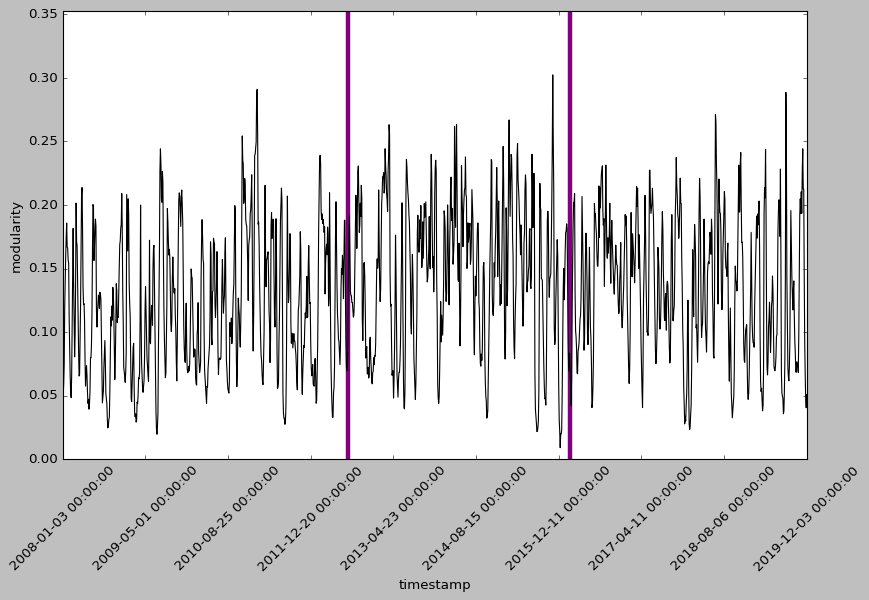

In [ ]:
#df_v['modularity'].plot()
fig, ax = plt.subplots(figsize=(12,7))
plt.xticks(rotation=45)
#plt.ylim(0.75, plot_df['resolution'].max()+0.05)
ax.margins(x = 0)
g = sns.lineplot(data = df_v.iloc[:1501], x = 'timestamp', y = 'modularity', ax=ax, color='black')

g.xaxis.set_major_locator(ticker.LinearLocator(10))
ax1 = g.axes
#ax1.hlines(1.032, ls='--', color='red', linewidth=4, xmin = plot_df.loc[0, 'timestamp'], xmax = plot_df.loc[81300, 'timestamp'])
#ax1.hlines(1.031, ls='--', color='blue', linewidth=4, xmin = plot_df.loc[81301, 'timestamp'], xmax = plot_df.loc[162600, 'timestamp'])
#ax1.hlines(1.037, ls='--', color='green', linewidth=4, xmin = plot_df.loc[162601, 'timestamp'], xmax = plot_df.loc[243999, 'timestamp'])
ax1.vlines(x = plot_df.loc[81300, 'timestamp'], colors='purple', ymin = 0, ymax = df_v['modularity'].max()+0.05, linewidths = 4)
#ax1.vlines(x = df_v.iloc[1510, 2], colors='purple', ymin = 0, ymax = df_v['modularity'].max()+0.05, linewidths = 4)
ax1.vlines(x = plot_df.loc[162600, 'timestamp'], colors='purple', ymin = 0, ymax = df_v['modularity'].max()+0.05, linewidths = 4)

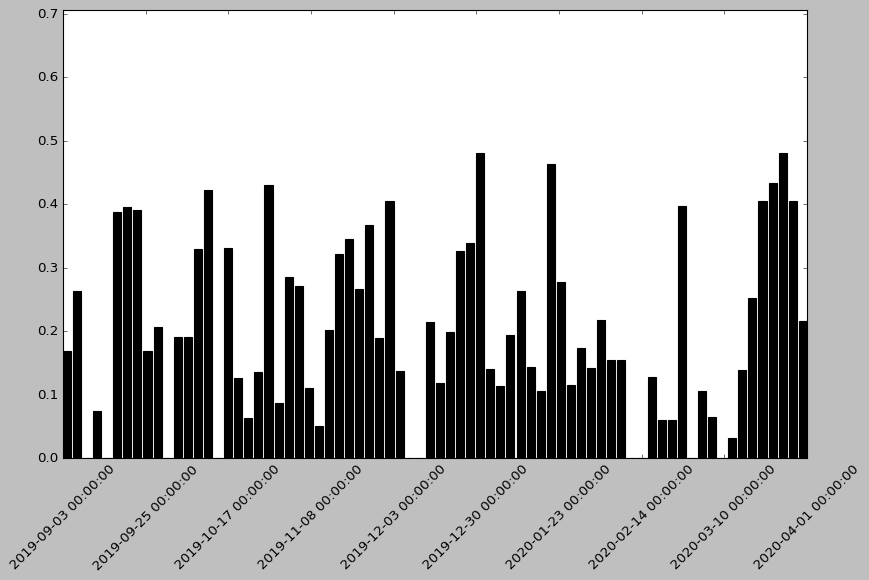

In [258]:
#df_v['modularity'].plot()
fig, ax = plt.subplots(figsize=(12,7))
plt.xticks(rotation=45)
plt.ylim(0, df_v['var_info'].max()+0.05)
ax.margins(x = 0)
g = plt.bar(df_v.iloc[1468:1542, 2], df_v.iloc[1468:1542, 0], color = 'black')

ax.xaxis.set_major_locator(ticker.LinearLocator(10))
#ax1 = g.axes
#ax1.hlines(1.032, ls='--', color='red', linewidth=4, xmin = plot_df.loc[0, 'timestamp'], xmax = plot_df.loc[81300, 'timestamp'])
#ax1.hlines(1.031, ls='--', color='blue', linewidth=4, xmin = plot_df.loc[81301, 'timestamp'], xmax = plot_df.loc[162600, 'timestamp'])
#ax1.hlines(1.037, ls='--', color='green', linewidth=4, xmin = plot_df.loc[162601, 'timestamp'], xmax = plot_df.loc[243999, 'timestamp'])
#ax1.vlines(x = plot_df.loc[81300, 'timestamp'], colors='purple', ymin = 0, ymax = df_v['var_info'].max()+0.05, linewidths = 4)
#ax1.vlines(x = plot_df.loc[162600, 'timestamp'], colors='purple', ymin = 0, ymax = df_v['var_info'].max()+0.05, linewidths = 4)

In [272]:
list(G_cache)[1500]

'2019-12-03 00:00:00'

In [277]:
merged = []
for timestamp in list(G_cache)[1500:1542]:
  merged.extend(comm_cache_mod_cov[timestamp])

In [278]:
merged_tuple = [tuple(elem) for elem in merged]

In [279]:
merged_dict = dict(Counter(merged_tuple))

In [280]:
sorted(merged_dict.items(), key=lambda item: item[1], reverse = True)

[((('nifty', 'inr'),
   ('nikkei', 'jpy'),
   ('nifty', 'sgd'),
   ('nifty', 'hkd'),
   ('nifty', 'jpy'),
   ('nifty', 'cny'),
   ('nifty', 'gbp'),
   ('nifty', 'usd'),
   ('nikkei', 'inr'),
   ('nikkei', 'sgd'),
   ('nikkei', 'hkd'),
   ('nikkei', 'cny'),
   ('nikkei', 'gbp'),
   ('nikkei', 'usd')),
  4),
 ((('nifty', 'inr'),
   ('sing_sti', 'sgd'),
   ('hangseng', 'hkd'),
   ('nikkei', 'jpy'),
   ('sp500', 'usd'),
   ('uk_100', 'gbp'),
   ('nifty', 'sgd'),
   ('nifty', 'hkd'),
   ('nifty', 'jpy'),
   ('nifty', 'cny'),
   ('nifty', 'gbp'),
   ('nifty', 'usd'),
   ('sing_sti', 'inr'),
   ('sing_sti', 'hkd'),
   ('sing_sti', 'jpy'),
   ('sing_sti', 'cny'),
   ('sing_sti', 'gbp'),
   ('sing_sti', 'usd'),
   ('hangseng', 'inr'),
   ('hangseng', 'sgd'),
   ('hangseng', 'jpy'),
   ('hangseng', 'cny'),
   ('hangseng', 'gbp'),
   ('hangseng', 'usd'),
   ('nikkei', 'inr'),
   ('nikkei', 'sgd'),
   ('nikkei', 'hkd'),
   ('nikkei', 'cny'),
   ('nikkei', 'gbp'),
   ('nikkei', 'usd'),
   ('sp500',

In [ ]:
merged_dict.values()

dict_values([22, 15, 40, 16, 72, 1, 3, 4, 9, 11, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 11, 1, 1, 2, 2, 1, 1, 2, 2, 6, 1, 2, 23, 1, 1, 2, 51, 14, 4, 2, 12, 7, 3, 1, 1, 2, 1, 3, 1, 1, 1, 5, 2, 1, 2, 1, 3, 1, 1, 1, 2, 4, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 5, 20, 7, 2, 2, 2, 9, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 3, 14, 4, 4, 2, 5, 3, 1, 2, 1, 1, 5, 4, 1, 6, 4, 1, 11, 1, 1, 1, 4, 1, 4, 2, 4, 1, 2, 3, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 14, 2, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 4, 2, 2, 1, 1, 2, 4, 1, 9, 1, 1, 7, 9, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 

### Centrality calc.


In [ ]:
def pd_fill_diagonal(corr_df, value=0): 
  arr = corr_df.values
  np.fill_diagonal(arr, value)
  corr_df = pd.DataFrame(arr, index=corr_df.index, columns=corr_df.columns)
  return corr_df

In [ ]:
G_cache_centrality = {}

for i in range(0, len(df_index.columns) - 2, 2):
    corr_df = 1/abs(df_index.iloc[:, i:i+20].T.corr())
    #corr_df.fillna(0)
    corr_df = pd_fill_diagonal(corr_df, 0)
    G_cache_centrality[df_index.columns[i]] = nx.from_pandas_adjacency(corr_df)

In [288]:
betweenness_dict = {}
for timestamp in list(G_cache_centrality)[1468:1500]:
  G = G_cache_centrality[timestamp]
  betwenness = nx.current_flow_betweenness_centrality(G, weight = 'weight', solver = 'lu')
  betweenness_dict = {key: betweenness_dict.get(key, 0) + betwenness.get(key, 0) for key in set(betweenness_dict) | set(betwenness)}
  #print(timestamp)

In [289]:
sorted(betweenness_dict.items(), key=lambda item: item[1], reverse = True)

[(('nikkei', 'gbp'), 1.958820872247006),
 (('sp500', 'usd'), 1.8322073782543338),
 (('nifty', 'gbp'), 1.612251664668975),
 (('sp500', 'gbp'), 1.5620360133963664),
 (('nikkei', 'hkd'), 1.5593201771600802),
 (('nikkei', 'cny'), 1.5571163678741713),
 (('nikkei', 'sgd'), 1.5490922677683265),
 (('nikkei', 'usd'), 1.5314043111403184),
 (('uk_100', 'gbp'), 1.5303937047864626),
 (('shanghai_comp', 'cny'), 1.5101212222899978),
 (('shanghai_comp', 'sgd'), 1.4567259575722953),
 (('sing_sti', 'gbp'), 1.4255020734436576),
 (('uk_100', 'cny'), 1.4184027670648784),
 (('nikkei', 'inr'), 1.397441779365821),
 (('nifty', 'cny'), 1.3869816725991868),
 (('nifty', 'sgd'), 1.331377276293989),
 (('nifty', 'inr'), 1.298298082030483),
 (('nifty', 'jpy'), 1.205514463756957),
 (('sing_sti', 'inr'), 1.1959887951645958),
 (('nifty', 'usd'), 1.179960319956336),
 (('nikkei', 'jpy'), 1.164701610743347),
 (('shanghai_comp', 'gbp'), 1.1401768690476375),
 (('nifty', 'hkd'), 1.117622527223192),
 (('uk_100', 'sgd'), 1.0653

### Plotting graphs

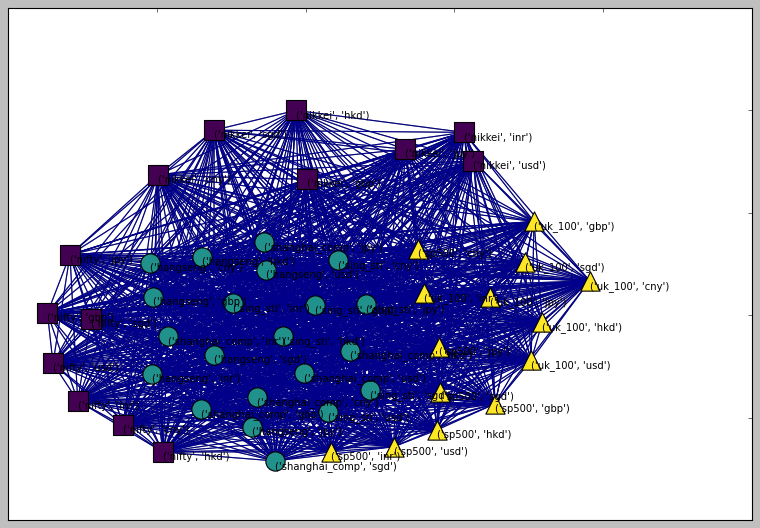

In [336]:
G = G_cache[list(G_cache)[1470]]
partition = comm_cache_cov[list(G_cache)[1470]]
plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(G, seed = 1337)
# color the nodes according to their partition
shapes = 'so^>v<dph8'
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
for node, color in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=300,
                           node_color=[cmap.colors[color]],
                           node_shape=shapes[color])
nx.draw_networkx_labels(G, pos, font_color='black', font_size = 9, verticalalignment='top', horizontalalignment='left')
nx.draw_networkx_edges(G, pos, edge_color='darkblue')

## Choosing resolution (Initial data run) : Use import file in the next block


In [ ]:
"""
WARNING: Runtime is 6 hours. Please use 'plot_df.csv' to import data
"""
df_res = pd.DataFrame(columns = G_cache.keys())
for timestamp in list(G_cache):
  G = G_cache[timestamp]
  print(timestamp)
  for i in range(500, 1200):
    df_res.loc[i-500, timestamp] = max((louvain.best_partition(G, random_state=1337, resolution=i/1000)).values())+1

df_res

2008-01-03 00:00:00
2008-01-07 00:00:00
2008-01-09 00:00:00
2008-01-11 00:00:00
2008-01-15 00:00:00
2008-01-17 00:00:00
2008-01-22 00:00:00
2008-01-24 00:00:00
2008-01-28 00:00:00
2008-01-30 00:00:00
2008-02-01 00:00:00
2008-02-05 00:00:00
2008-02-07 00:00:00
2008-02-11 00:00:00
2008-02-13 00:00:00
2008-02-15 00:00:00
2008-02-20 00:00:00
2008-02-22 00:00:00
2008-02-26 00:00:00
2008-02-28 00:00:00
2008-03-03 00:00:00
2008-03-05 00:00:00
2008-03-07 00:00:00
2008-03-11 00:00:00
2008-03-13 00:00:00
2008-03-17 00:00:00
2008-03-19 00:00:00
2008-03-24 00:00:00
2008-03-26 00:00:00
2008-03-28 00:00:00
2008-04-01 00:00:00
2008-04-03 00:00:00
2008-04-07 00:00:00
2008-04-09 00:00:00
2008-04-11 00:00:00
2008-04-15 00:00:00
2008-04-17 00:00:00
2008-04-21 00:00:00
2008-04-23 00:00:00
2008-04-25 00:00:00
2008-04-29 00:00:00
2008-05-01 00:00:00
2008-05-05 00:00:00
2008-05-07 00:00:00
2008-05-09 00:00:00
2008-05-13 00:00:00
2008-05-15 00:00:00
2008-05-19 00:00:00
2008-05-21 00:00:00
2008-05-23 00:00:00


,2008-01-03 00:00:00,2008-01-07 00:00:00,2008-01-09 00:00:00,2008-01-11 00:00:00,2008-01-15 00:00:00,2008-01-17 00:00:00,2008-01-22 00:00:00,2008-01-24 00:00:00,2008-01-28 00:00:00,2008-01-30 00:00:00,2008-02-01 00:00:00,2008-02-05 00:00:00,2008-02-07 00:00:00,2008-02-11 00:00:00,2008-02-13 00:00:00,2008-02-15 00:00:00,2008-02-20 00:00:00,2008-02-22 00:00:00,2008-02-26 00:00:00,2008-02-28 00:00:00,2008-03-03 00:00:00,2008-03-05 00:00:00,2008-03-07 00:00:00,2008-03-11 00:00:00,2008-03-13 00:00:00,2008-03-17 00:00:00,2008-03-19 00:00:00,2008-03-24 00:00:00,2008-03-26 00:00:00,2008-03-28 00:00:00,2008-04-01 00:00:00,2008-04-03 00:00:00,2008-04-07 00:00:00,2008-04-09 00:00:00,2008-04-11 00:00:00,2008-04-15 00:00:00,2008-04-17 00:00:00,2008-04-21 00:00:00,2008-04-23 00:00:00,2008-04-25 00:00:00,...,2020-01-02 00:00:00,2020-01-06 00:00:00,2020-01-08 00:00:00,2020-01-10 00:00:00,2020-01-14 00:00:00,2020-01-16 00:00:00,2020-01-21 00:00:00,2020-01-23 00:00:00,2020-01-27 00:00:00,2020-01-29 00:00:00,2020-01-31 00:00:00,2020-02-04 00:00:00,2020-02-06 00:00:00,2020-02-10 00:00:00,2020-02-12 00:00:00,2020-02-14 00:00:00,2020-02-19 00:00:00,2020-02-21 00:00:00,2020-02-25 00:00:00,2020-02-27 00:00:00,2020-03-02 00:00:00,2020-03-04 00:00:00,2020-03-06 00:00:00,2020-03-10 00:00:00,2020-03-12 00:00:00,2020-03-16 00:00:00,2020-03-18 00:00:00,2020-03-20 00:00:00,2020-03-24 00:00:00,2020-03-26 00:00:00,2020-03-30 00:00:00,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-09 00:00:00,2020-04-14 00:00:00,2020-04-16 00:00:00,2020-04-20 00:00:00,2020-04-22 00:00:00,2020-04-24 00:00:00
0,49,49,49,49,42,36,37,37,36,33,32,32,39,41,39,41,49,49,46,38,33,34,36,37,43,38,33,31,34,36,42,43,43,44,47,44,41,38,31,36,...,40,43,43,42,42,42,42,37,35,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
1,49,49,49,49,42,36,37,37,36,33,32,32,39,41,39,41,49,49,46,38,33,34,36,37,42,38,33,30,34,36,42,43,43,44,47,44,41,38,31,36,...,40,43,43,42,42,42,42,37,35,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
2,49,49,49,49,42,36,37,37,35,33,32,32,39,41,39,41,49,49,46,38,33,34,36,37,42,37,33,30,34,36,42,43,43,44,47,44,41,38,31,36,...,40,43,43,42,42,42,42,37,35,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
3,49,49,49,49,41,35,37,37,35,33,32,32,39,41,39,41,49,49,46,38,33,34,36,37,42,37,33,30,34,36,42,43,43,44,47,44,41,38,31,35,...,40,43,43,42,42,42,42,37,35,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
4,49,49,49,49,41,35,37,37,35,33,31,32,39,41,39,41,49,49,46,38,33,34,36,37,42,37,32,30,34,36,42,43,43,44,47,44,41,38,31,34,...,40,43,43,42,42,42,42,37,34,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,1,1,1,2,2,3,3,3,2,2,2,3,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,2,1,1,1,2,2,2,2,2,3,2,1
696,1,1,1,1,2,2,3,3,3,2,2,2,3,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,2,1,1,1,2,2,2,2,2,3,2,1
697,1,1,1,1,2,2,3,3,3,2,2,2,3,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,2,1,1,1,2,2,2,2,2,3,2,1
698,1,1,1,1,2,2,3,3,3,2,2,2,3,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,2,1,1,1,2,2,2,2,2,3,2,1


In [ ]:
df_res.to_csv('/content/drive/My Drive/collab_files/comm_count_final.csv', index_label = 'index')

In [ ]:
G = G_cache[list(G_cache)[100]]
#print(timestamp)
for i in range(500, 1200):
  mod = (louvain.best_partition(G, random_state=1337, resolution=i/1000))
  mod1 = (louvain.best_partition(G, random_state=1337, resolution=(i/1000)+0.001))
  df_res.loc[i-500, 'comm_count'] = max(mod.values())+1
  df_res.loc[i-500, 'vi'] = max(mod.values())+1

## Choosing resolution : File import

In [ ]:
df_res = pd.read_csv('/content/drive/My Drive/collab_files/comm_count_final.csv', index_col = ['index'])

In [ ]:
df_res.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            690, 691, 692, 693, 694, 695, 696, 697, 698, 699],
           dtype='int64', name='index', length=700)

In [ ]:
df_res

,2008-01-03 00:00:00,2008-01-07 00:00:00,2008-01-09 00:00:00,2008-01-11 00:00:00,2008-01-15 00:00:00,2008-01-17 00:00:00,2008-01-22 00:00:00,2008-01-24 00:00:00,2008-01-28 00:00:00,2008-01-30 00:00:00,2008-02-01 00:00:00,2008-02-05 00:00:00,2008-02-07 00:00:00,2008-02-11 00:00:00,2008-02-13 00:00:00,2008-02-15 00:00:00,2008-02-20 00:00:00,2008-02-22 00:00:00,2008-02-26 00:00:00,2008-02-28 00:00:00,2008-03-03 00:00:00,2008-03-05 00:00:00,2008-03-07 00:00:00,2008-03-11 00:00:00,2008-03-13 00:00:00,2008-03-17 00:00:00,2008-03-19 00:00:00,2008-03-24 00:00:00,2008-03-26 00:00:00,2008-03-28 00:00:00,2008-04-01 00:00:00,2008-04-03 00:00:00,2008-04-07 00:00:00,2008-04-09 00:00:00,2008-04-11 00:00:00,2008-04-15 00:00:00,2008-04-17 00:00:00,2008-04-21 00:00:00,2008-04-23 00:00:00,2008-04-25 00:00:00,...,2020-01-02 00:00:00,2020-01-06 00:00:00,2020-01-08 00:00:00,2020-01-10 00:00:00,2020-01-14 00:00:00,2020-01-16 00:00:00,2020-01-21 00:00:00,2020-01-23 00:00:00,2020-01-27 00:00:00,2020-01-29 00:00:00,2020-01-31 00:00:00,2020-02-04 00:00:00,2020-02-06 00:00:00,2020-02-10 00:00:00,2020-02-12 00:00:00,2020-02-14 00:00:00,2020-02-19 00:00:00,2020-02-21 00:00:00,2020-02-25 00:00:00,2020-02-27 00:00:00,2020-03-02 00:00:00,2020-03-04 00:00:00,2020-03-06 00:00:00,2020-03-10 00:00:00,2020-03-12 00:00:00,2020-03-16 00:00:00,2020-03-18 00:00:00,2020-03-20 00:00:00,2020-03-24 00:00:00,2020-03-26 00:00:00,2020-03-30 00:00:00,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-09 00:00:00,2020-04-14 00:00:00,2020-04-16 00:00:00,2020-04-20 00:00:00,2020-04-22 00:00:00,2020-04-24 00:00:00
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,49,49,49,49,42,36,37,37,36,33,32,32,39,41,39,41,49,49,46,38,33,34,36,37,43,38,33,31,34,36,42,43,43,44,47,44,41,38,31,36,...,40,43,43,42,42,42,42,37,35,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
1,49,49,49,49,42,36,37,37,36,33,32,32,39,41,39,41,49,49,46,38,33,34,36,37,42,38,33,30,34,36,42,43,43,44,47,44,41,38,31,36,...,40,43,43,42,42,42,42,37,35,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
2,49,49,49,49,42,36,37,37,35,33,32,32,39,41,39,41,49,49,46,38,33,34,36,37,42,37,33,30,34,36,42,43,43,44,47,44,41,38,31,36,...,40,43,43,42,42,42,42,37,35,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
3,49,49,49,49,41,35,37,37,35,33,32,32,39,41,39,41,49,49,46,38,33,34,36,37,42,37,33,30,34,36,42,43,43,44,47,44,41,38,31,35,...,40,43,43,42,42,42,42,37,35,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
4,49,49,49,49,41,35,37,37,35,33,31,32,39,41,39,41,49,49,46,38,33,34,36,37,42,37,32,30,34,36,42,43,43,44,47,44,41,38,31,34,...,40,43,43,42,42,42,42,37,34,43,43,43,43,43,44,44,47,49,49,49,49,49,48,48,41,42,44,47,46,49,48,46,43,36,37,37,37,39,44,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,1,1,1,2,2,3,3,3,2,2,2,3,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,2,1,1,1,2,2,2,2,2,3,2,1
696,1,1,1,1,2,2,3,3,3,2,2,2,3,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,2,1,1,1,2,2,2,2,2,3,2,1
697,1,1,1,1,2,2,3,3,3,2,2,2,3,2,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,2,2,2,1,1,2,1,1,1,2,2,2,2,2,3,2,1


### Plotting VI at multiple resolutions 

In [ ]:
G = G_cache[list(G_cache)[100]]
comm_cache_mod = {}
for res in range(700):
  comm_iter = louvain.best_partition(G, weight = 'weight', random_state = 1337, resolution = (res/1000)+0.5)
  comm_count = max(comm_iter.values())+1
  comm_cache_mod_list = [[] for i in range(comm_count)]
  for node in list(comm_iter):
    i = comm_iter[node]
    comm_cache_mod_list[i].append(node)
  comm_cache_mod[(res)+500] = comm_cache_mod_list

In [ ]:
df_vi = pd.DataFrame(index = list(comm_cache_mod))

In [ ]:
for res in df_vi.index[:-1]:
  df_vi.loc[res, list(G_cache)[100]] = variation_of_information(comm_cache_mod[res], comm_cache_mod[res+1])

In [ ]:
for i in df_vi.index:
  df_vi.loc[i, 'comm_count'] = df_res.loc[i-500, list(G_cache)[100]]

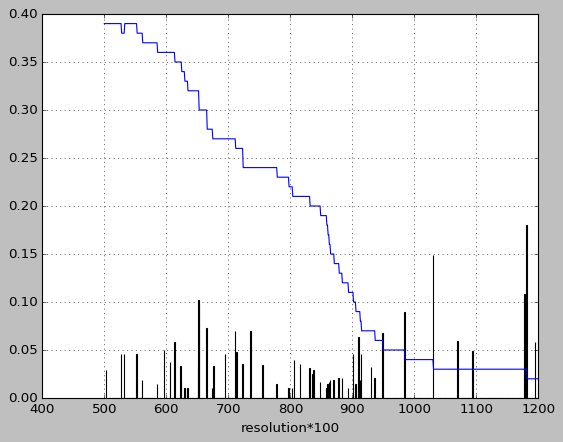

In [ ]:
plt.bar(df_vi.index, df_vi[list(G_cache)[100]])
plt.plot(df_vi['comm_count']/100)
plt.xlabel('resolution*100')
plt.grid(b = True)

In [ ]:
list(G_cache)[1050]

'2016-05-06 00:00:00'

### Resolution plot dataset construction

In [ ]:
#df_res[(df_res[list(G_cache)[0]] == 3) or (df_res[list(G_cache)[0]] == 4)]
df_mod = df_res[(df_res[list(G_cache)[0]] == 3)].append(df_res[(df_res[list(G_cache)[0]] == 4)])

In [ ]:
for i in df_mod.index:
  print(i/1000)

In [ ]:
df_res[(df_res.loc[:, list(G_cache)[0]] == 4)][list(G_cache)[0]]

In [ ]:
df_mod

In [ ]:
plot_df = pd.DataFrame(columns = ['timestamp', 'resolution'])
for timestamp in list(G_cache):
  print(timestamp)
  df_mod = df_res[(df_res[timestamp] == 4)].append(df_res[df_res[timestamp] == 3])
  for res in df_mod.index:
    plot_df = plot_df.append({'timestamp': timestamp, 'resolution': (res/1000)+0.5}, ignore_index=True)

In [ ]:
plot_df.to_csv('/content/drive/My Drive/collab_files/plot_df.csv', index_label = 'index')

### Resolution plot

In [ ]:
plot_df = pd.read_csv('/content/drive/My Drive/collab_files/plot_df.csv', index_col = ['index'])

In [ ]:
plot_df[0:80000]

,timestamp,resolution
index,,
0,2008-01-03 00:00:00,0.996
1,2008-01-03 00:00:00,0.997
2,2008-01-03 00:00:00,0.998
3,2008-01-03 00:00:00,0.999
4,2008-01-03 00:00:00,1.000
...,...,...
79995,2012-07-03 00:00:00,1.032
79996,2012-07-03 00:00:00,1.033
79997,2012-07-03 00:00:00,1.034


In [ ]:
type(plot_df.iloc[1, 0])

str

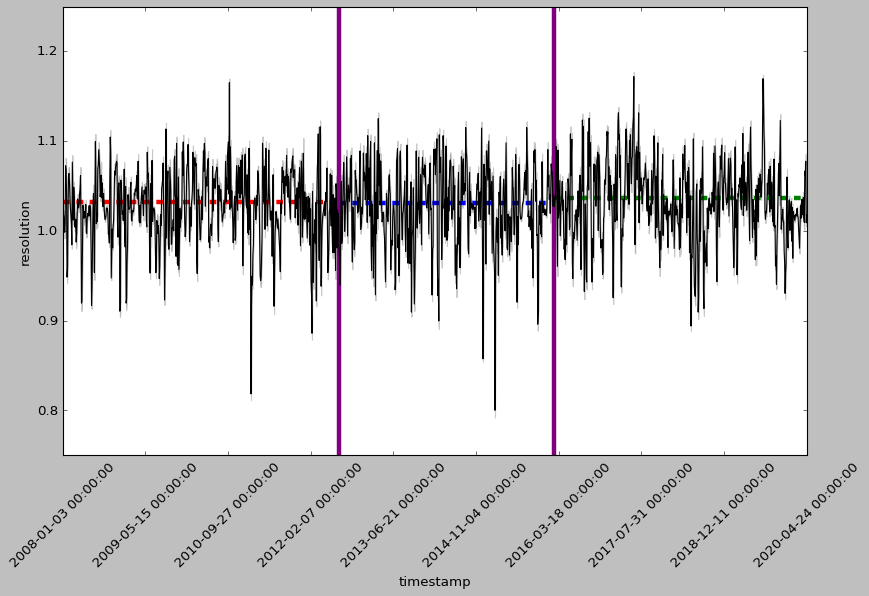

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
plt.xticks(rotation=45)
plt.ylim(0.75, plot_df['resolution'].max()+0.05)
ax.margins(x = 0)
g = sns.lineplot(data = plot_df, x = 'timestamp', y = 'resolution', ax=ax, color='black')

g.xaxis.set_major_locator(ticker.LinearLocator(10))
ax1 = g.axes
ax1.hlines(1.032, ls='--', color='red', linewidth=4, xmin = plot_df.loc[0, 'timestamp'], xmax = plot_df.loc[81300, 'timestamp'])
ax1.hlines(1.031, ls='--', color='blue', linewidth=4, xmin = plot_df.loc[81301, 'timestamp'], xmax = plot_df.loc[162600, 'timestamp'])
ax1.hlines(1.037, ls='--', color='green', linewidth=4, xmin = plot_df.loc[162601, 'timestamp'], xmax = plot_df.loc[243999, 'timestamp'])
ax1.vlines(x = plot_df.loc[81300, 'timestamp'], colors='purple', ymin = 0.75, ymax = plot_df['resolution'].max()+0.05, linewidths = 4)
ax1.vlines(x = plot_df.loc[162600, 'timestamp'], colors='purple', ymin = 0.75, ymax = plot_df['resolution'].max()+0.05, linewidths = 4)

In [ ]:
plot_df[160000:]['resolution'].mean()

1.0374701904761894

In [ ]:
plot_df['timestamp'].max()

'2020-04-24 00:00:00'

In [ ]:
plot_df.loc[80000, 'timestamp']

'2012-07-03 00:00:00'

In [ ]:
plot_df

,timestamp,resolution
index,,
0,2008-01-03 00:00:00,0.996
1,2008-01-03 00:00:00,0.997
2,2008-01-03 00:00:00,0.998
3,2008-01-03 00:00:00,0.999
4,2008-01-03 00:00:00,1.000
...,...,...
243995,2020-04-24 00:00:00,1.029
243996,2020-04-24 00:00:00,1.030
243997,2020-04-24 00:00:00,1.031
